In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
from histo_utilities import create_TH1D, create_TH2D, std_color_list

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.10/08


In [2]:
fpath = {}
tree = {}
process = {}

fpath['mu'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-B0_MuNuDmst-pD0bar-kp-_NoPU_10-2-3_v1/BPH_Tag-Bm_D0kpmunu_Probe-B0_MuNuDmst-pD0bar-kp-_BPHMC_merged_1-300.root'
process['mu'] = 'B_{0} #rightarrow D^{*-}(#bar{D}_{0}(K^{+}#pi^{-})#pi^{-})#mu^{+}#nu'

fpath['tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-B0_TauNuDmst-pD0bar-kp-tau2mununu_BPHMC_merged_1-300.root'
process['tau'] = 'B_{0} #rightarrow D^{*-}(#bar{D}_{0}(K^{+}#pi^{-})#pi^{-})#tau^{+}(#mu^{+}#nu#bar{#nu})#nu'

# fpath['Dst_mu'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeumunu_BPHMC_merged.root'
# process['Dst_mu'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#mu^{+}#nu'

# fpath['Dst_tau'] = '../data/cmsMC_private/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_NoPU_10-2-3_v0/BPH_Tag-Bm_D0kpmunu_Probe-Bp_D0stkpNeutaunu_tau2mununu_BPHMC_merged.root'
# process['Dst_tau'] = 'B^{+} #rightarrow #bar{D}^{*}_{0}(D_{0} n#gamma)#tau^{+}(#mu^{+}#nu#nu)#nu'

for k,v in fpath.iteritems():
    tree[k] = rtnp.root2array(v)

Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [3]:
DecayChannelBr = {}
DecayChannelBr['mu'] = 4.88e-2 * 67e-2 * 3.89e-2
DecayChannelBr['tau'] = 1.67e-2 * 17.39e-2 * 67e-2 * 3.89e-2

In [4]:
weights = {}

sumBr = np.sum(np.array(DecayChannelBr.values()))
for k,v in DecayChannelBr.iteritems():
    weights[k] = v/sumBr
    
print weights

{'mu': 0.9438317596679413, 'tau': 0.05616824033205858}


In [5]:
var_dict = {}
var_dict['M_vis'] = [50, 0, 7]
var_dict['M_ext'] = [50, 0, 10]
var_dict['D_pthat'] = [50, 0, 3]
var_dict['mu_ip'] = [80, 0, 0.08]

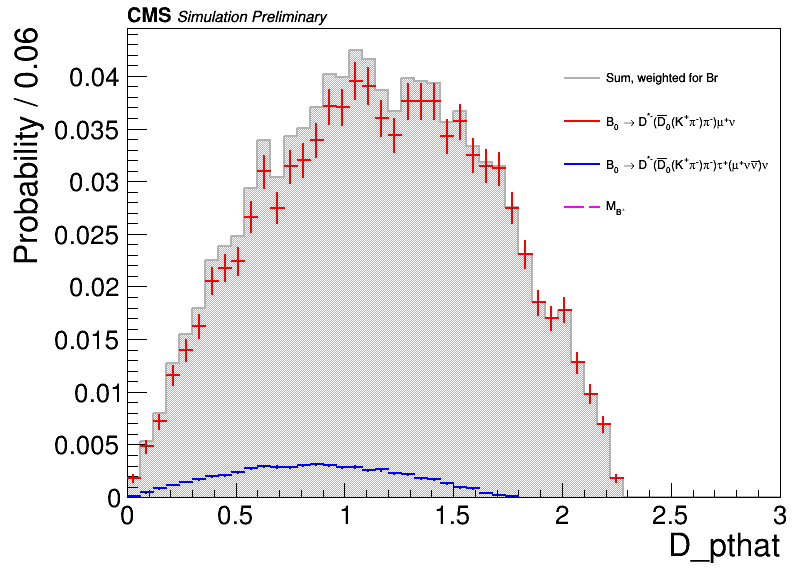

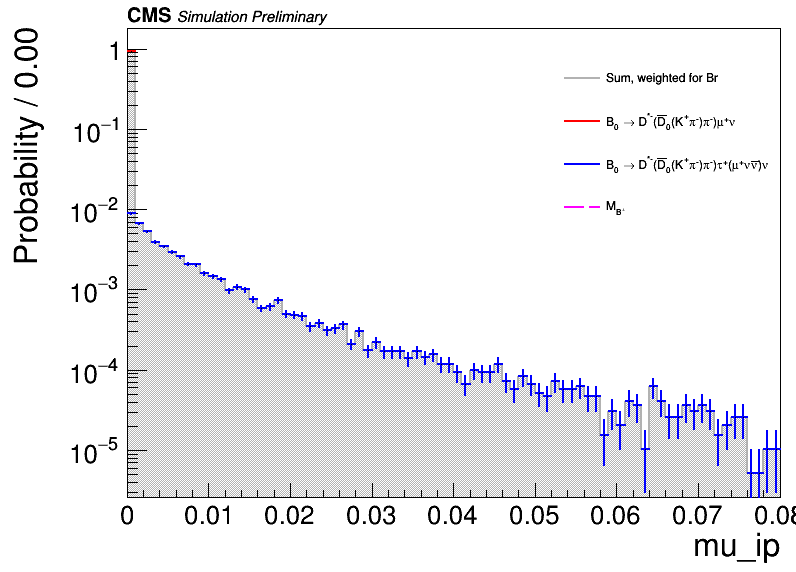

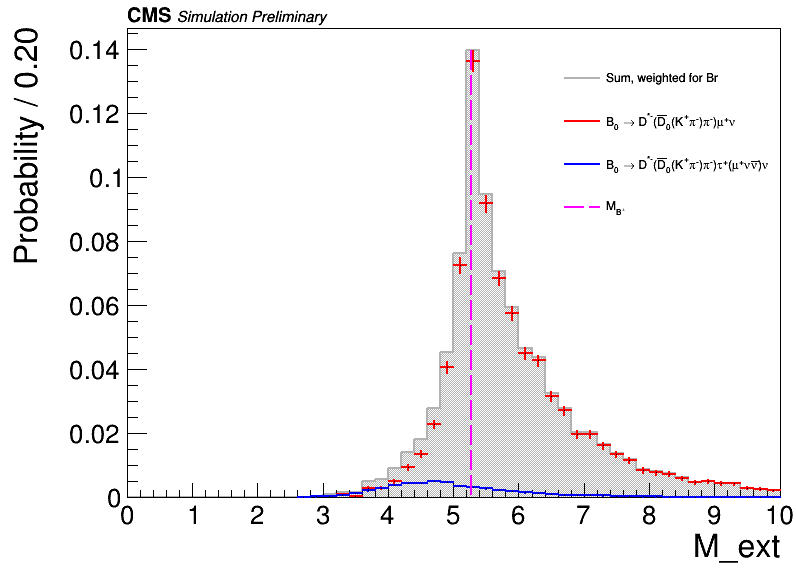

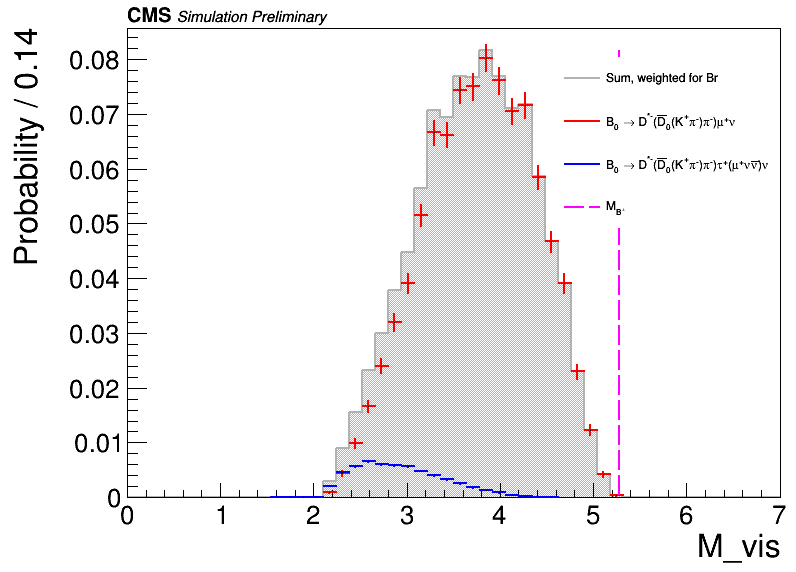

In [6]:
for var, binning in var_dict.iteritems():
    leg = rt.TLegend(0.7,0.6,0.95,0.9)
    leg.SetTextFont(42)
    leg.SetTextAlign(12)
    leg.SetLineWidth(0)
    leg.SetBorderSize(0)
    
    h_sum = rt.TH1D('h_sum'+var, '', binning[0], binning[1], binning[2])
    h_sum.SetXTitle(var)
    h_sum.SetYTitle('Probability / {:.2f}'.format(h_sum.GetBinWidth(1)))
    h_sum.GetYaxis().SetTitleOffset(1.3)
    h_sum.SetStats(0)
    h_sum.SetLineColor(16)
    h_sum.SetFillColor(16)
    h_sum.constituents = []
    leg.AddEntry(h_sum, 'Sum, weighted for Br', 'l')
    
    for i_n, n in enumerate(tree.keys()):
        h = create_TH1D(tree[n][var], name='h_'+n+'_'+var, binning=binning)
        h.SetStats(0)
        h.Scale(weights[n]/h.GetEntries())
        h.SetLineColor(std_color_list[i_n+1])
        leg.AddEntry(h, process[n], 'l')
        
        h_sum.Add(h)
        h_sum.constituents.append(h)

    ln = rt.TLine()
    ln.SetLineColor(6)
    ln.SetLineWidth(2)
    ln.SetLineStyle(9)
    leg.AddEntry(ln, 'M_{B^{#pm}}', 'l')
    
    h_sum.Sumw2(0)
    h_sum.SetFillStyle(3001)
    
    c = rt.TCanvas('c_'+var, 'c_'+var,50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)
    
    h_sum.Draw()
    for h in h_sum.constituents:
        h.Draw('SAME')
    
    ln.DrawLine(5.279, 0, 5.279, h_sum.GetMaximum())
    leg.Draw()
    
    if var in ['mu_ip']:
        c.SetLogy()
    
    CMS_lumi.CMS_lumi(c, -1, 0)
    c.Draw()
    
    donotdelete.append([c, h_sum, leg])

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_M_vis


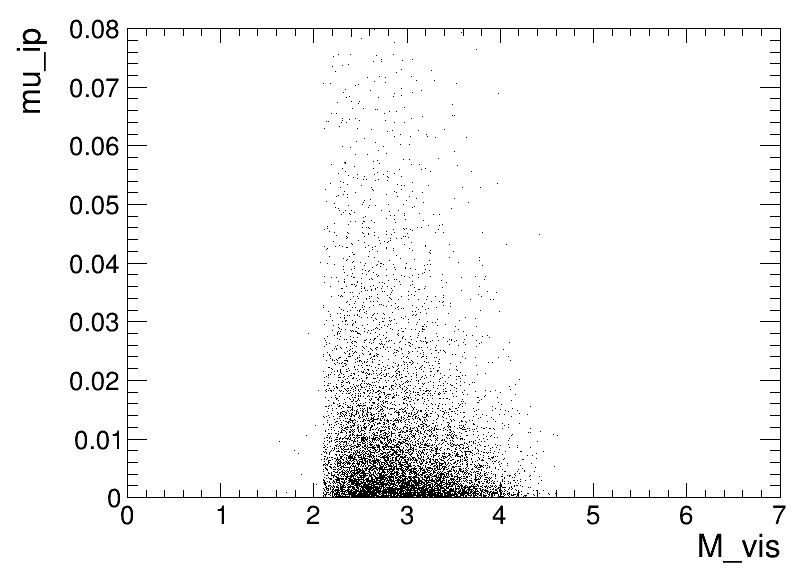

In [9]:
var_pair_list = [['M_vis', 'mu_ip']]

for v1, v2 in var_pair_list:
    sample = np.column_stack((tree['tau'][v1], tree['tau'][v2]))
    binning = var_dict[v1] + var_dict[v2]
    h_2d = create_TH2D(sample, axis_title=[v1, v2,''], binning=binning)
    h_2d.SetStats(0)


    c = rt.TCanvas('c_'+var, 'c_'+var,50,50,800,600)

    h_2d.Draw()
    c.Draw()

In [8]:
# h_dphi_B = create_TH1D(tree['tau']['dphi_B'], axis_title=['#phi^{B}_{probe} - #phi^{B}_{tag} [rad]', ''])
# h_dphi_B.SetStats(0)

# c = rt.TCanvas('c_dphi', 'c_dphi', 600, 600)
# h_dphi_B.Draw('colz')
# c.Draw()